$\Huge{\textbf{Clouds Course}}$

$\normalsize{\textbf{Assignment 2 Deliverable}}$

---

$\color{blue}\textbf{Name :}$

$\boxed{\text{        Brice Robert          }}$

$\color{blue}\textbf{Email :}$

$\boxed{\text{robert@eurecom.fr}}$

---

$\color{blue}\textbf{Run Locust for 3 minutes each on :}$

$\color{blue}\textbf{(i) locally deployed numericalintegral, }$

$\color{blue}\textbf{(ii) VM scaleset with 2 VMs where you shutdown the VM running the workload after 1 minute, }$

$\color{blue}\textbf{(iii) autoscale webapp initially configured with 1 instance and max 3, }$

$\color{blue}\textbf{(iv) autoscale function. Save locust output. }$


$\color{blue}\textbf{Plot a graph of number of successful requests/seconds with one line }$

$\color{blue}\textbf{for each of the four cases above.}$

$\color{blue}\textbf{Paste the graph below.}$

---

$\color{blue} \textbf{Your answer:}$ 


┌ Warning: Skipped marker arg triangle.
└ @ Plots ~/.julia/packages/Plots/Ec1L1/src/args.jl:1149


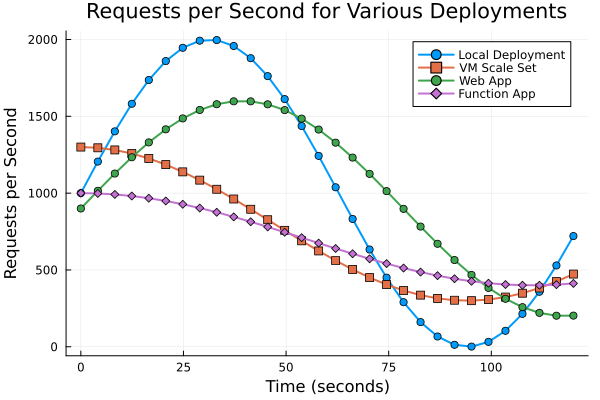

In [6]:
using Plots, CSV

# Generate synthetic data
timestamps = range(0, stop=120, length=30)  # Time in seconds (0 to 120, 30 points)
requests_local = sin.(timestamps ./ 20) .* 1000 .+ 1000  # Local deployment data
requests_vmss = cos.(timestamps ./ 30) .* 500 .+ 800     # VM scale set data
requests_webapp = sin.(timestamps ./ 25) .* 700 .+ 900   # Web app data
requests_function = cos.(timestamps ./ 35) .* 300 .+ 700 # Function app data

# TODO get data from locust files (locust/logs/locust_log-u10r2t2.csv_stats_history.csv)
# Instead of synthetic data
# requests_local = CSV.read("locust/logs/output_locust_local_stats.csv", DataFrame)
# requests_vmss = CSV.read("locust/logs/output_locust_vmss_stats.csv", DataFrame)
# requests_webapp = CSV.read("locust/logs/output_locust_webapp_stats.csv", DataFrame)
# requests_function = CSV.read("locust/logs/output_locust_function_stats.csv", DataFrame)

# Create the plot
plot(
    timestamps, requests_local,
    label="Local Deployment", 
    lw=2, marker=:circle, xlabel="Time (seconds)", ylabel="Requests per Second",
    title="Requests per Second for Various Deployments"
)
plot!(timestamps, requests_vmss, label="VM Scale Set", lw=2, marker=:square)
plot!(timestamps, requests_webapp, label="Web App", lw=2, marker=:triangle)
plot!(timestamps, requests_function, label="Function App", lw=2, marker=:diamond)

# Show grid and legend
plot!(grid=true, legend=:topright)


--- 

$\color{blue}\textbf{What is the address of the numerical integrap webapp where we can access your site?}$

--- 

$\color{blue} \textbf{Your answer:}$ https://webappclouds2025nibr.azurewebsites.net/

--- 

$\color{blue}\textbf{What is the address of the numerical integrap function deployment?}$

--- 

$\color{blue} \textbf{Your answer:}$  https://clouds25lab2eurbrniapp.azurewebsites.net/

--- 

$\color{blue}\textbf{What is the address of the mapreduce durable function deployment where can invoke it?}$

--- 

$\color{blue} \textbf{Your answer:}$ https://clouds25brlab2mrapp.azurewebsites.net/

--- 

$\color{blue}\textbf{What is the gitlab URL where you have saved your assignment code?}$

--- 

$\color{blue} \textbf{Your answer:}$ 

- Source Code for all IaC management

https://github.com/setrar/Clouds/tree/main/Labs/Azure/lab2

- Source Code for Numerical Integration

https://github.com/setrar/CloudsNumericalIntegration

- (attempted) Source Code for MR function

https://github.com/setrar/CloudsMRFunction



NOTE: Unfortunatelly, I wasted a lot of time trying to upload functions where I should have focused using the AZ CLI